Phase 4



Unsupervised ML (Clustering)



Note: This phase requires your general knowledge and thought process to merge the right datasets and the right columns. Collecting quality data is a key factor to create meaningful clusters and Analysis.



Assumption: You were given various crime datasets that contains all the DISTRICTS in each state and you were asked to provide the below data to the higher authorities for further action.



4.1  "Create 3 clusters as below.



1. Sensitive Area's



2. Moderate Area's



3. Peaceful Area's"



4.2  Create DataFrame for each cluster that shows data according to the areas.



4.3  "Analyse your clusters and prepare a report that explains all your observations.



Example - 



1. What is impacting more crimes in sensitive areas. 



2. What needs to be done to reduce crime. 



3. Most safe and unsafe districts.



4. Etc.......Anything that you observe (If you want, you can plot various graphs to analyze)"



4.4   Capstone project overall story in your own words. Min 1000 words

In [1]:
#lets import necessary library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('01_District_wise_crimes_committed_IPC_2001_2012.csv')
df.head()

,STATE/UT,DISTRICT,YEAR,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,...,ARSON,HURT/GREVIOUS HURT,DOWRY DEATHS,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES
0,ANDHRA PRADESH,ADILABAD,2001,101,60,17,50,0,50,46,...,30,1131,16,149,34,175,0,181,1518,4154
1,ANDHRA PRADESH,ANANTAPUR,2001,151,125,1,23,0,23,53,...,69,1543,7,118,24,154,0,270,754,4125
2,ANDHRA PRADESH,CHITTOOR,2001,101,57,2,27,0,27,59,...,38,2088,14,112,83,186,0,404,1262,5818
3,ANDHRA PRADESH,CUDDAPAH,2001,80,53,1,20,0,20,25,...,23,795,17,126,38,57,0,233,1181,3140
4,ANDHRA PRADESH,EAST GODAVARI,2001,82,67,1,23,0,23,49,...,41,1244,12,109,58,247,0,431,2313,6507


In [3]:
df.drop(df[df['DISTRICT'] == 'TOTAL'].index, inplace=True)

In [4]:
df.reset_index(drop=True)

,STATE/UT,DISTRICT,YEAR,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,...,ARSON,HURT/GREVIOUS HURT,DOWRY DEATHS,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES
0,ANDHRA PRADESH,ADILABAD,2001,101,60,17,50,0,50,46,...,30,1131,16,149,34,175,0,181,1518,4154
1,ANDHRA PRADESH,ANANTAPUR,2001,151,125,1,23,0,23,53,...,69,1543,7,118,24,154,0,270,754,4125
2,ANDHRA PRADESH,CHITTOOR,2001,101,57,2,27,0,27,59,...,38,2088,14,112,83,186,0,404,1262,5818
3,ANDHRA PRADESH,CUDDAPAH,2001,80,53,1,20,0,20,25,...,23,795,17,126,38,57,0,233,1181,3140
4,ANDHRA PRADESH,EAST GODAVARI,2001,82,67,1,23,0,23,49,...,41,1244,12,109,58,247,0,431,2313,6507
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8604,DELHI UT,STF,2012,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,6
8605,DELHI UT,WEST,2012,52,37,10,79,0,79,454,...,18,227,18,53,6,327,0,292,1144,5558
8606,LAKSHADWEEP,LAKSHADWEEP,2012,0,0,0,0,0,0,0,...,3,3,0,1,0,1,0,0,32,60
8607,PUDUCHERRY,KARAIKAL,2012,5,6,2,6,0,6,2,...,1,186,0,2,0,1,0,44,392,787


In [5]:
X = df.drop(['STATE/UT','DISTRICT','YEAR'], axis=1)

In [6]:
#scale our data using standard sclar
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
X_scaled=scalar.fit_transform(X)

In [7]:
# Fitting K-Means to the dataset
from sklearn.decomposition import PCA
pca = PCA(2)
X = pca.fit_transform(X)

In [8]:
from sklearn.cluster import KMeans

In [9]:
model = KMeans(n_clusters=3, random_state=42)

y = model.fit_predict(X)

In [10]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [18]:
df['cluster'] = model.labels_

## Cluster according to district wise

In [23]:
peaceful_areas = df[df['cluster'] == 0]
moderate_areas = df[df['cluster'] == 1]
sensitive_areas = df[df['cluster'] == 2]

In [24]:
sensitive_areas

,STATE/UT,DISTRICT,YEAR,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,...,HURT/GREVIOUS HURT,DOWRY DEATHS,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES,cluster
255,KARNATAKA,BANGALORE COMMR.,2001,221,327,5,40,0,40,152,...,3735,40,223,51,229,0,38,11106,27254,2
370,MAHARASHTRA,MUMBAI,2001,295,200,6,127,0,127,148,...,3845,18,274,44,198,0,709,6095,28968,2
700,DELHI UT,DELHI UT TOTAL,2001,547,510,63,381,0,381,1627,...,2011,113,502,90,138,0,432,22000,54384,2
972,KARNATAKA,BANGALORE COMMR.,2002,201,311,4,32,0,32,159,...,4029,33,237,62,242,0,45,11801,29120,2
1087,MAHARASHTRA,MUMBAI,2002,252,134,7,128,0,128,119,...,3542,18,254,40,214,0,753,5950,26276,2
1418,DELHI UT,DELHI UT TOTAL,2002,531,440,68,403,0,403,1323,...,1851,135,446,128,135,0,416,20876,49137,2
1695,KARNATAKA,BANGALORE COMMR.,2003,216,280,1,34,0,34,132,...,3847,34,213,39,213,0,84,12547,29260,2
1816,MAHARASHTRA,MUMBAI,2003,242,115,8,133,0,133,150,...,3562,8,282,44,199,0,632,5865,25686,2
2147,DELHI UT,DELHI UT TOTAL,2003,485,407,65,490,0,490,1156,...,1708,130,489,105,1211,0,402,20045,47404,2
2423,KARNATAKA,BANGALORE COMMR.,2004,214,285,2,32,0,32,175,...,3542,44,151,35,227,0,104,11008,28526,2


In [25]:
peaceful_areas

,STATE/UT,DISTRICT,YEAR,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,...,HURT/GREVIOUS HURT,DOWRY DEATHS,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES,cluster
0,ANDHRA PRADESH,ADILABAD,2001,101,60,17,50,0,50,46,...,1131,16,149,34,175,0,181,1518,4154,0
1,ANDHRA PRADESH,ANANTAPUR,2001,151,125,1,23,0,23,53,...,1543,7,118,24,154,0,270,754,4125,0
3,ANDHRA PRADESH,CUDDAPAH,2001,80,53,1,20,0,20,25,...,795,17,126,38,57,0,233,1181,3140,0
5,ANDHRA PRADESH,GUNTAKAL RLY.,2001,3,1,0,0,0,0,0,...,1,0,1,0,0,0,4,104,287,0
13,ANDHRA PRADESH,MEDAK,2001,101,56,12,35,0,35,26,...,1367,26,100,25,192,0,335,454,3532,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9009,DELHI UT,SOUTH-WEST,2012,47,48,6,87,0,87,399,...,131,18,69,21,207,0,4,1387,4085,0
9010,DELHI UT,STF,2012,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,6,0
9012,LAKSHADWEEP,LAKSHADWEEP,2012,0,0,0,0,0,0,0,...,3,0,1,0,1,0,0,32,60,0
9014,PUDUCHERRY,KARAIKAL,2012,5,6,2,6,0,6,2,...,186,0,2,0,1,0,44,392,787,0


In [26]:
moderate_areas

,STATE/UT,DISTRICT,YEAR,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,...,HURT/GREVIOUS HURT,DOWRY DEATHS,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES,cluster
2,ANDHRA PRADESH,CHITTOOR,2001,101,57,2,27,0,27,59,...,2088,14,112,83,186,0,404,1262,5818,1
4,ANDHRA PRADESH,EAST GODAVARI,2001,82,67,1,23,0,23,49,...,1244,12,109,58,247,0,431,2313,6507,1
6,ANDHRA PRADESH,GUNTUR,2001,182,88,2,54,0,54,82,...,1792,7,139,129,378,0,369,2426,7848,1
7,ANDHRA PRADESH,HYDERABAD CITY,2001,111,113,7,37,0,37,80,...,3137,24,118,27,746,0,409,1512,11831,1
8,ANDHRA PRADESH,KARIMNAGAR,2001,162,85,6,56,0,56,67,...,1392,62,414,81,224,0,322,1726,5811,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9005,DELHI UT,NORTH-WEST,2012,60,37,8,64,0,64,357,...,166,12,19,14,212,0,9,1253,4542,1
9006,DELHI UT,OUTER,2012,96,60,15,67,0,67,572,...,224,15,79,18,244,0,90,2006,6344,1
9007,DELHI UT,SOUTH,2012,39,19,3,70,0,70,245,...,101,17,59,36,68,0,25,1651,5045,1
9008,DELHI UT,SOUTH-EAST,2012,46,69,6,116,0,116,538,...,252,11,160,43,123,0,218,2004,7040,1


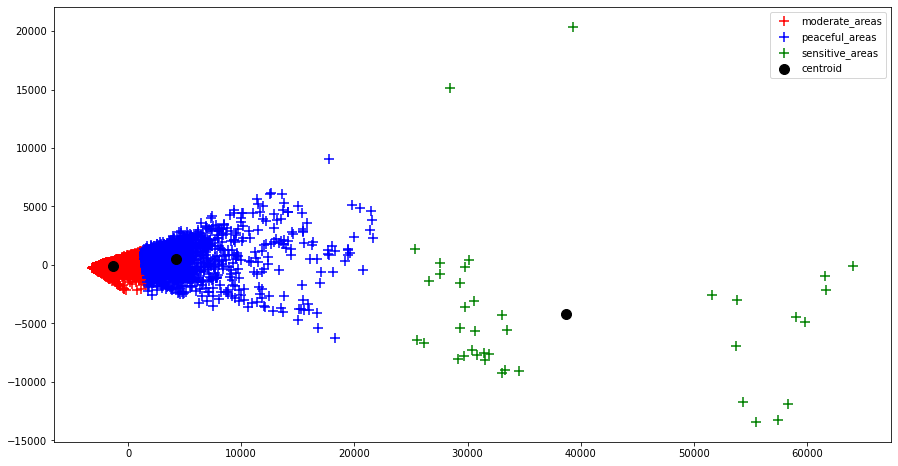

In [27]:
plt.figure(figsize=(15,8))
plt.scatter(X[y == 0, 0], X[y == 0, 1], s = 100, c = 'red', marker='+', label = 'moderate_areas')
plt.scatter(X[y == 1, 0], X[y == 1, 1], s = 100, c = 'blue', marker='+', label = 'peaceful_areas')
plt.scatter(X[y == 2, 0], X[y == 2, 1], s = 100, c = 'green', marker='+', label = 'sensitive_areas')
plt.scatter(model.cluster_centers_[:,0],model.cluster_centers_[:,1], s = 100, color='black', label='centroid')
plt.legend()
plt.show()

## ANALYSIS BY STATE WISE

In [28]:
#lets import necessary library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [29]:
df = pd.read_csv('01_District_wise_crimes_committed_IPC_2001_2012.csv')
df.head()

,STATE/UT,DISTRICT,YEAR,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,...,ARSON,HURT/GREVIOUS HURT,DOWRY DEATHS,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES
0,ANDHRA PRADESH,ADILABAD,2001,101,60,17,50,0,50,46,...,30,1131,16,149,34,175,0,181,1518,4154
1,ANDHRA PRADESH,ANANTAPUR,2001,151,125,1,23,0,23,53,...,69,1543,7,118,24,154,0,270,754,4125
2,ANDHRA PRADESH,CHITTOOR,2001,101,57,2,27,0,27,59,...,38,2088,14,112,83,186,0,404,1262,5818
3,ANDHRA PRADESH,CUDDAPAH,2001,80,53,1,20,0,20,25,...,23,795,17,126,38,57,0,233,1181,3140
4,ANDHRA PRADESH,EAST GODAVARI,2001,82,67,1,23,0,23,49,...,41,1244,12,109,58,247,0,431,2313,6507


In [30]:
df.drop(df[df['DISTRICT'] == 'TOTAL'].index, inplace=True)

In [31]:
df.reset_index(drop=True)

,STATE/UT,DISTRICT,YEAR,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,...,ARSON,HURT/GREVIOUS HURT,DOWRY DEATHS,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES
0,ANDHRA PRADESH,ADILABAD,2001,101,60,17,50,0,50,46,...,30,1131,16,149,34,175,0,181,1518,4154
1,ANDHRA PRADESH,ANANTAPUR,2001,151,125,1,23,0,23,53,...,69,1543,7,118,24,154,0,270,754,4125
2,ANDHRA PRADESH,CHITTOOR,2001,101,57,2,27,0,27,59,...,38,2088,14,112,83,186,0,404,1262,5818
3,ANDHRA PRADESH,CUDDAPAH,2001,80,53,1,20,0,20,25,...,23,795,17,126,38,57,0,233,1181,3140
4,ANDHRA PRADESH,EAST GODAVARI,2001,82,67,1,23,0,23,49,...,41,1244,12,109,58,247,0,431,2313,6507
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8604,DELHI UT,STF,2012,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,6
8605,DELHI UT,WEST,2012,52,37,10,79,0,79,454,...,18,227,18,53,6,327,0,292,1144,5558
8606,LAKSHADWEEP,LAKSHADWEEP,2012,0,0,0,0,0,0,0,...,3,3,0,1,0,1,0,0,32,60
8607,PUDUCHERRY,KARAIKAL,2012,5,6,2,6,0,6,2,...,1,186,0,2,0,1,0,44,392,787


In [32]:
#Removing unncessary columns
df.drop(['YEAR'],axis=1,inplace = True)

In [33]:
grouped_df = df.groupby(['STATE/UT']).sum()
grouped_df

,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS,KIDNAPPING AND ABDUCTION OF OTHERS,DACOITY,...,ARSON,HURT/GREVIOUS HURT,DOWRY DEATHS,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES
STATE/UT,,,,,,,,,,,,,,,,,,,,,
A & N ISLANDS,160,65,21,109,0,109,94,77,17,15,...,98,1105,6,214,43,121,0,42,4443,9102
ANDHRA PRADESH,31756,22420,1763,13479,2,13477,21239,14936,6303,1987,...,11968,546565,6215,51999,36131,119007,17,138435,482252,2018981
ARUNACHAL PRADESH,841,417,36,500,0,500,857,558,299,260,...,250,5157,2,784,18,167,0,745,7396,27652
ASSAM,15432,5662,718,16178,5,16173,27939,22920,5019,4170,...,7918,69183,1276,13620,112,39388,8,30205,181354,597764
BIHAR,41245,40919,3672,13124,2,13122,37220,19389,17831,11099,...,8509,189266,13548,7576,226,25680,440,44442,538591,1346293
CHANDIGARH,243,301,79,281,0,281,640,534,106,31,...,62,816,42,314,143,807,0,98,11605,40807
CHHATTISGARH,12060,7910,348,11838,0,11838,3345,2630,715,1468,...,3147,85026,1142,19165,1725,9573,5,25432,245855,561027
D & N HAVELI,108,31,3,56,0,56,141,94,47,40,...,55,318,1,50,4,38,0,148,1859,4651
DAMAN & DIU,68,38,2,20,0,20,31,15,16,34,...,34,190,3,15,2,35,0,311,661,2948


In [34]:
total_crimes=['MURDER', 'ATTEMPT TO MURDER',
       'CULPABLE HOMICIDE NOT AMOUNTING TO MURDER', 'RAPE', 'CUSTODIAL RAPE',
       'OTHER RAPE', 'KIDNAPPING & ABDUCTION',
       'KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS',
       'KIDNAPPING AND ABDUCTION OF OTHERS', 'DACOITY',
       'PREPARATION AND ASSEMBLY FOR DACOITY', 'ROBBERY', 'BURGLARY', 'THEFT',
       'AUTO THEFT', 'OTHER THEFT', 'RIOTS', 'CRIMINAL BREACH OF TRUST',
       'CHEATING', 'COUNTERFIETING', 'ARSON', 'HURT/GREVIOUS HURT',
       'DOWRY DEATHS', 'ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY',
       'INSULT TO MODESTY OF WOMEN', 'CRUELTY BY HUSBAND OR HIS RELATIVES',
       'IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES',
       'CAUSING DEATH BY NEGLIGENCE', 'OTHER IPC CRIMES', 'TOTAL IPC CRIMES']

In [35]:
# adding one extra column and that is total number of death
grouped_df['Total_Crimes'] = grouped_df[total_crimes].sum(axis=1)

In [36]:
grouped_df.head()

,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS,KIDNAPPING AND ABDUCTION OF OTHERS,DACOITY,...,HURT/GREVIOUS HURT,DOWRY DEATHS,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES,Total_Crimes
STATE/UT,,,,,,,,,,,,,,,,,,,,,
A & N ISLANDS,160,65,21,109,0,109,94,77,17,15,...,1105,6,214,43,121,0,42,4443,9102,19531
ANDHRA PRADESH,31756,22420,1763,13479,2,13477,21239,14936,6303,1987,...,546565,6215,51999,36131,119007,17,138435,482252,2018981,4359870
ARUNACHAL PRADESH,841,417,36,500,0,500,857,558,299,260,...,5157,2,784,18,167,0,745,7396,27652,61839
ASSAM,15432,5662,718,16178,5,16173,27939,22920,5019,4170,...,69183,1276,13620,112,39388,8,30205,181354,597764,1325120
BIHAR,41245,40919,3672,13124,2,13122,37220,19389,17831,11099,...,189266,13548,7576,226,25680,440,44442,538591,1346293,2896302


In [70]:
grouped_df

,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS,KIDNAPPING AND ABDUCTION OF OTHERS,DACOITY,...,DOWRY DEATHS,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES,Total_Crimes,cluster
STATE/UT,,,,,,,,,,,,,,,,,,,,,
A & N ISLANDS,160,65,21,109,0,109,94,77,17,15,...,6,214,43,121,0,42,4443,9102,19531,1
ANDHRA PRADESH,31756,22420,1763,13479,2,13477,21239,14936,6303,1987,...,6215,51999,36131,119007,17,138435,482252,2018981,4359870,0
ARUNACHAL PRADESH,841,417,36,500,0,500,857,558,299,260,...,2,784,18,167,0,745,7396,27652,61839,1
ASSAM,15432,5662,718,16178,5,16173,27939,22920,5019,4170,...,1276,13620,112,39388,8,30205,181354,597764,1325120,1
BIHAR,41245,40919,3672,13124,2,13122,37220,19389,17831,11099,...,13548,7576,226,25680,440,44442,538591,1346293,2896302,2
CHANDIGARH,243,301,79,281,0,281,640,534,106,31,...,42,314,143,807,0,98,11605,40807,101009,1
CHHATTISGARH,12060,7910,348,11838,0,11838,3345,2630,715,1468,...,1142,19165,1725,9573,5,25432,245855,561027,1200110,1
D & N HAVELI,108,31,3,56,0,56,141,94,47,40,...,1,50,4,38,0,148,1859,4651,10272,1
DAMAN & DIU,68,38,2,20,0,20,31,15,16,34,...,3,15,2,35,0,311,661,2948,6511,1


In [37]:
grouped_df.shape

(35, 31)

In [38]:
X=grouped_df

In [39]:
#scale our data using standard sclar
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
X_scaled=scalar.fit_transform(X)

In [40]:
from sklearn.decomposition import PCA
pca = PCA(2)
X = pca.fit_transform(X)

In [41]:
from sklearn.cluster import KMeans

In [42]:
model = KMeans(n_clusters=3, random_state=42)

y = model.fit_predict(X)

In [43]:
y

array([1, 0, 1, 1, 2, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 2, 2, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 2])

In [44]:
# Just like in supervised learning we have a metric in unsupervised learning as well
from sklearn.metrics import silhouette_score

In [46]:
silhouette_score(X,y)

0.7193544980082326

## Cluster according state wise

In [51]:
grouped_df['cluster'] = model.labels_

In [57]:
sensitive_areas = grouped_df[grouped_df['cluster'] == 0]
peaceful_areas = grouped_df[grouped_df['cluster'] == 1]
moderate_areas = grouped_df[grouped_df['cluster'] == 2]

In [58]:
peaceful_areas

,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS,KIDNAPPING AND ABDUCTION OF OTHERS,DACOITY,...,DOWRY DEATHS,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES,Total_Crimes,cluster
STATE/UT,,,,,,,,,,,,,,,,,,,,,
A & N ISLANDS,160,65,21,109,0,109,94,77,17,15,...,6,214,43,121,0,42,4443,9102,19531,1
ARUNACHAL PRADESH,841,417,36,500,0,500,857,558,299,260,...,2,784,18,167,0,745,7396,27652,61839,1
ASSAM,15432,5662,718,16178,5,16173,27939,22920,5019,4170,...,1276,13620,112,39388,8,30205,181354,597764,1325120,1
CHANDIGARH,243,301,79,281,0,281,640,534,106,31,...,42,314,143,807,0,98,11605,40807,101009,1
CHHATTISGARH,12060,7910,348,11838,0,11838,3345,2630,715,1468,...,1142,19165,1725,9573,5,25432,245855,561027,1200110,1
D & N HAVELI,108,31,3,56,0,56,141,94,47,40,...,1,50,4,38,0,148,1859,4651,10272,1
DAMAN & DIU,68,38,2,20,0,20,31,15,16,34,...,3,15,2,35,0,311,661,2948,6511,1
GOA,487,269,67,350,0,350,236,164,72,55,...,19,328,123,191,0,2664,9948,32051,72733,1
HARYANA,10471,7434,857,6410,1,6409,8656,6129,2527,1375,...,3130,5323,8188,27112,0,15197,224844,595303,1337066,1


In [59]:
moderate_areas

,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS,KIDNAPPING AND ABDUCTION OF OTHERS,DACOITY,...,DOWRY DEATHS,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES,Total_Crimes,cluster
STATE/UT,,,,,,,,,,,,,,,,,,,,,
BIHAR,41245,40919,3672,13124,2,13122,37220,19389,17831,11099,...,13548,7576,226,25680,440,44442,538591,1346293,2896302,2
DELHI UT,12410,10554,1766,12848,0,12848,50166,31300,18866,762,...,3164,15068,3374,30422,2,15006,474914,1266348,3058802,2
GUJARAT,13775,6112,430,4249,0,4249,15246,12918,2328,3842,...,502,8998,1365,59431,0,54385,729684,1385775,3004252,2
KARNATAKA,19937,18512,857,5174,2,5172,10029,5315,4714,2581,...,2918,23699,831,30052,47,5078,681336,1481063,3177289,2
KERALA,4733,5327,1897,7447,0,7447,2891,1898,993,1364,...,301,31490,3304,46074,0,489,829883,1437459,2947609,2
WEST BENGAL,21056,14693,6333,20787,0,20787,25999,21773,4226,2642,...,5172,22871,1554,130668,114,37751,426194,1119304,2475862,2


In [60]:
sensitive_areas

,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS,KIDNAPPING AND ABDUCTION OF OTHERS,DACOITY,...,DOWRY DEATHS,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES,Total_Crimes,cluster
STATE/UT,,,,,,,,,,,,,,,,,,,,,
ANDHRA PRADESH,31756,22420,1763,13479,2,13477,21239,14936,6303,1987,...,6215,51999,36131,119007,17,138435,482252,2018981,4359870,0
MADHYA PRADESH,28399,29458,1834,36087,1,36086,11958,9243,2715,1655,...,9036,79878,9317,39969,60,64969,1196582,2413770,5139445,0
MAHARASHTRA,32767,20589,1409,17986,2,17984,15101,10853,4248,8175,...,4249,39219,12110,80363,2,134613,560060,2273436,5136766,0
RAJASTHAN,15844,21342,889,15798,0,15798,30727,24671,6056,563,...,5066,30853,354,100101,6,78350,784991,1855916,3991331,0
TAMIL NADU,20127,26597,343,6952,2,6950,15303,12436,2867,1237,...,2317,19329,10043,18188,15,140193,1186115,2060176,4327767,0
UTTAR PRADESH,65443,60520,17266,19058,2,19056,59266,47590,11676,4809,...,23824,29698,26511,77617,3,113821,626949,1858074,4106519,0


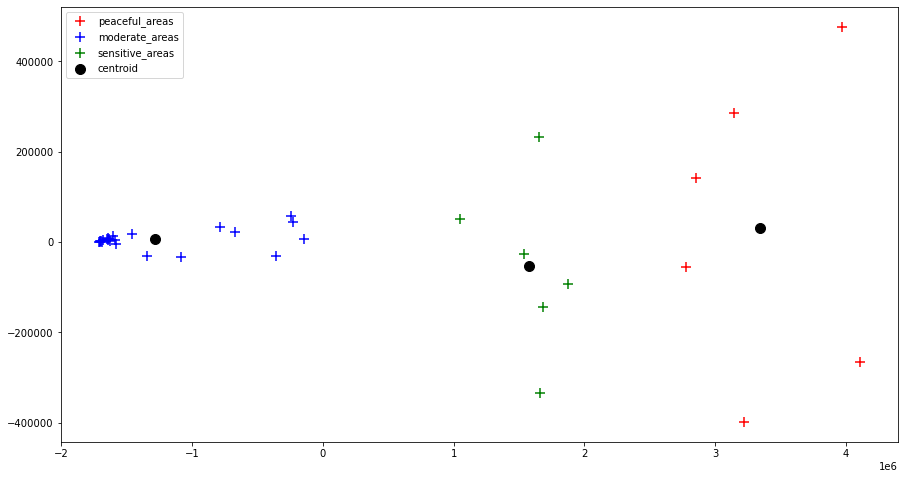

In [61]:
plt.figure(figsize=(15,8))
plt.scatter(X[y == 0, 0], X[y == 0, 1], s = 100, c = 'red', marker='+', label = 'peaceful_areas')
plt.scatter(X[y == 1, 0], X[y == 1, 1], s = 100, c = 'blue', marker='+', label = 'moderate_areas')
plt.scatter(X[y == 2, 0], X[y == 2, 1], s = 100, c = 'green', marker='+', label = 'sensitive_areas')
plt.scatter(model.cluster_centers_[:,0],model.cluster_centers_[:,1], s = 100, color='black', label='centroid')
plt.legend()
plt.show()

# 4.2  Create DataFrame for each cluster that shows data according to the areas.

In [ ]:
sensitive_areas = grouped_df[grouped_df['cluster'] == 0]
peaceful_areas = grouped_df[grouped_df['cluster'] == 1]
moderate_areas = grouped_df[grouped_df['cluster'] == 2]

In [64]:
import pandas as pd

Sensitive_Area = pd.DataFrame(sensitive_areas)

In [65]:
Sensitive_Area

,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS,KIDNAPPING AND ABDUCTION OF OTHERS,DACOITY,...,DOWRY DEATHS,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES,Total_Crimes,cluster
STATE/UT,,,,,,,,,,,,,,,,,,,,,
ANDHRA PRADESH,31756,22420,1763,13479,2,13477,21239,14936,6303,1987,...,6215,51999,36131,119007,17,138435,482252,2018981,4359870,0
MADHYA PRADESH,28399,29458,1834,36087,1,36086,11958,9243,2715,1655,...,9036,79878,9317,39969,60,64969,1196582,2413770,5139445,0
MAHARASHTRA,32767,20589,1409,17986,2,17984,15101,10853,4248,8175,...,4249,39219,12110,80363,2,134613,560060,2273436,5136766,0
RAJASTHAN,15844,21342,889,15798,0,15798,30727,24671,6056,563,...,5066,30853,354,100101,6,78350,784991,1855916,3991331,0
TAMIL NADU,20127,26597,343,6952,2,6950,15303,12436,2867,1237,...,2317,19329,10043,18188,15,140193,1186115,2060176,4327767,0
UTTAR PRADESH,65443,60520,17266,19058,2,19056,59266,47590,11676,4809,...,23824,29698,26511,77617,3,113821,626949,1858074,4106519,0


In [66]:
Peaceful_Area = pd.DataFrame(peaceful_areas)

In [67]:
Peaceful_Area

,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS,KIDNAPPING AND ABDUCTION OF OTHERS,DACOITY,...,DOWRY DEATHS,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES,Total_Crimes,cluster
STATE/UT,,,,,,,,,,,,,,,,,,,,,
A & N ISLANDS,160,65,21,109,0,109,94,77,17,15,...,6,214,43,121,0,42,4443,9102,19531,1
ARUNACHAL PRADESH,841,417,36,500,0,500,857,558,299,260,...,2,784,18,167,0,745,7396,27652,61839,1
ASSAM,15432,5662,718,16178,5,16173,27939,22920,5019,4170,...,1276,13620,112,39388,8,30205,181354,597764,1325120,1
CHANDIGARH,243,301,79,281,0,281,640,534,106,31,...,42,314,143,807,0,98,11605,40807,101009,1
CHHATTISGARH,12060,7910,348,11838,0,11838,3345,2630,715,1468,...,1142,19165,1725,9573,5,25432,245855,561027,1200110,1
D & N HAVELI,108,31,3,56,0,56,141,94,47,40,...,1,50,4,38,0,148,1859,4651,10272,1
DAMAN & DIU,68,38,2,20,0,20,31,15,16,34,...,3,15,2,35,0,311,661,2948,6511,1
GOA,487,269,67,350,0,350,236,164,72,55,...,19,328,123,191,0,2664,9948,32051,72733,1
HARYANA,10471,7434,857,6410,1,6409,8656,6129,2527,1375,...,3130,5323,8188,27112,0,15197,224844,595303,1337066,1


In [68]:
Moderate_Area = pd.DataFrame(moderate_areas)

In [69]:
Moderate_Area

,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS,KIDNAPPING AND ABDUCTION OF OTHERS,DACOITY,...,DOWRY DEATHS,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES,Total_Crimes,cluster
STATE/UT,,,,,,,,,,,,,,,,,,,,,
BIHAR,41245,40919,3672,13124,2,13122,37220,19389,17831,11099,...,13548,7576,226,25680,440,44442,538591,1346293,2896302,2
DELHI UT,12410,10554,1766,12848,0,12848,50166,31300,18866,762,...,3164,15068,3374,30422,2,15006,474914,1266348,3058802,2
GUJARAT,13775,6112,430,4249,0,4249,15246,12918,2328,3842,...,502,8998,1365,59431,0,54385,729684,1385775,3004252,2
KARNATAKA,19937,18512,857,5174,2,5172,10029,5315,4714,2581,...,2918,23699,831,30052,47,5078,681336,1481063,3177289,2
KERALA,4733,5327,1897,7447,0,7447,2891,1898,993,1364,...,301,31490,3304,46074,0,489,829883,1437459,2947609,2
WEST BENGAL,21056,14693,6333,20787,0,20787,25999,21773,4226,2642,...,5172,22871,1554,130668,114,37751,426194,1119304,2475862,2


# 4.3  "Analyse your clusters and prepare a report that explains all your observations.

## 1. What is impacting more crimes in sensitive areas. 

our analysis has shown that murder, attempt to murder, rape, other rape, kidnapping & abduction, cruelty by husband or his relatives, causing death by negligence, other IPC crimes, and total IPC crimes are impacting crime rates in sensitive areas, there are a number of potential factors that may be contributing to these issues.

For example, higher rates of murder and attempted murder may be linked to factors such as gang violence, drug trafficking, or other criminal activity that is more prevalent in sensitive areas.Similarly, higher rates of rape and other sexual crimes may be linked to factors such as gender inequality, lack of access to resources, and inadequate support for victims. Kidnapping & abduction may be linked to a range of factors, including domestic violence, human trafficking, and other criminal activity.Cruelty by husband or his relatives may be linked to factors such as gender inequality, cultural norms, and lack of legal protections for victims. Causing death by negligence may be linked to factors such as inadequate safety regulations, poor infrastructure, and lack of resources for emergency services. Other IPC crimes may include a wide range of criminal activity, such as theft, burglary, and fraud. 

## 2. What needs to be done to reduce crime. 

Reducing crime rates in sensitive areas will require a multi-faceted approach that addresses the underlying social and economic factors that contribute to criminal activity, as well as targeting specific types of crime with effective prevention and enforcement measures. Some possible strategies that can be employed to reduce crime rates in sensitive areas include:

1] Increasing community engagement and trust: Building stronger relationships between law enforcement and the community can help to increase trust and cooperation, which can in turn lead to more effective prevention and enforcement efforts.

2] Targeted law enforcement initiatives: Focusing law enforcement efforts on specific types of crime, such as gang violence or human trafficking, can help to disrupt criminal networks and reduce crime rates.

3] Strengthening legal protections for victims: Ensuring that victims of crime have access to support services, legal representation, and other resources can help to reduce the impact of crime and increase the likelihood of successful prosecution.

4] Improving access to resources and opportunities: Addressing underlying social and economic factors, such as poverty, lack of education, and unemployment, can help to reduce the likelihood of criminal activity by providing individuals with more opportunities and resources.

5] Increasing education and awareness: Providing education and awareness programs on topics such as domestic violence, sexual assault, and other forms of crime can help to reduce the incidence of these crimes and increase reporting.

6] Strengthening safety regulations and infrastructure: Ensuring that safety regulations are in place and enforced, and that infrastructure is adequate to support emergency services and other needs, can help to reduce the incidence of accidents and other forms of unintentional harm.

These are just a few of the many strategies that can be employed to reduce crime rates in sensitive areas.

## 3. Most safe and unsafe districts.

The identification of peaceful and sensitive areas through k-means clustering can provide valuable insights into the distribution of crime rates across different regions. Peaceful areas are those districts where the crime rate is low, and people feel safe living there. These areas may have lower levels of poverty, better access to education and healthcare, and stronger social cohesion, all of which can contribute to lower crime rates. In peaceful areas, residents may feel a greater sense of security and may be less likely to engage in criminal activity, leading to lower crime rates overall.SO there are something call peacefull area according to our k-means clusterting they found that there are 6774 district are present in which the crime rate is low and consider as safe districts 


On the other hand, sensitive areas are those districts where the crime rate is high, and people may feel unsafe or vulnerable to criminal activity. These areas may have higher levels of poverty, social inequality, and unemployment, which can create a sense of hopelessness and desperation that can contribute to criminal behavior. In sensitive areas, residents may be more likely to engage in criminal activity as a means of survival or to exert power over others. Additionally, sensitive areas may be more attractive to criminal organizations, such as gangs or drug cartels, which can exacerbate the problem of crime and violence and there is agian something call as sensitive are according to our k-means clusterting they found that there are 39 district are present in which the crime rate is high and consider as unsafe districts

# 4.4   Capstone project overall story in your own words. Min 1000 words.

Capstone project This project is all about crimes in India from the year 2001 to 2012. in this project, we have given some sample datasets to do analysis and there were 4 phases into which this project is divided into. The dataset that we have given the 01_disterct_wise dataset contains maximum information but another dataset also conation different information so I have only done analysis on the 01_district_wise dataset. this dataset contains all the crimes like Murder Robbery cheating rapes and many more, the other dataset contains other information on other crimes like different age groups and their related crime, property-related crimes, etc.

so in phase 1, we have to collect different data related to this like the population of each state, the literacy rate of each state, and the area of each state I have searched on the internet and I found 1 site which contains the required information but it's only for the year 2001 so I search it for rest I don't find proper data so I make the data by adding some number to the previous data that is 2001 and created the data for the year 2002 and so on to the last year 2012 as we know the population is increased from 2001 to 2012.

so in phase 2, we have given some tasks to perform here we have to do some analysis by making the graphs and by any means, and for each and every graph we have to write the observation for that I have done some analysis on power bi and some on Jupyter book as well.

so In phase 3, we have given some tasks to perform on SQL where we have to write a query for all the questions they asked. for that, I have used MySQL Workbench to complete my task. I have to write a query and get all the required output that we needed.

So the last phase that is phase 4, it's an Unsupervised Machine Learning Technique where we have to make clusters for 3 different areas like 1. Sensitive Area 2. Moderate Areas 3. Peaceful Areas" and also we have to make a dataset according to what output was. I learned different Techniques in the same project I have to look at some information from the internet and after that, I merged group by them do some analysis, and also perform some SQL operations last I performed some unsupervised Machine learning Algorithms.



In [1]:
#Student of DataScience
#Student of DataTrained- Jayram Ishwar Phulwalkar
#Date - 20 - o9 -2023
#Time - 17:14